In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
class values:
    f_b0=0
    f_b1=0
    f_b2=0
    f_b3=0


In [2]:
#Calculation the error (sse)
def error(b0,b1,b2,b3,points):
    totalError=0
    for i in range(1,len(points)-1):
        x1=points[i,9]
        x2=points[i,6]
        x3=points[i,7]
        #x4=points[i,8]
        #x1=points[i,1]
        y=points[i,0]
        totalError+=(y-(b0+b1*x1+b2*x2+b3*x3))**2
    return totalError/float(len(points)-1)


In [3]:
#calcuating gradient
def step_gradient(c_b0,c_b1,c_b2,c_b3,points,learningRate):
    g_b0=0
    g_b1=0
    g_b2=0
    g_b3=0
    N=float(len(points)-1)
    for i in range(1,len(points)-1):
        x1=points[i,9]
        x2=points[i,6]
        x3=points[i,7]
        #x4=points[i,8]
        #x1=points[i,1]
        y=points[i,0]
        g_b0+=-(2/N)*(y-(c_b0+c_b1*x1+c_b2*x2+c_b3+x3))
        g_b1+=-(2/N)*x1*(y-(c_b0+c_b1*x1+c_b2*x2+c_b3+x3))
        g_b2+=-(2/N)*x2*(y-(c_b0+c_b1*x1+c_b2*x2+c_b3+x3))
        g_b3+=-(2/N)*x3*(y-(c_b0+c_b1*x1+c_b2*x2+c_b3+x3))
    new_b0=c_b0-(learningRate*g_b0)
    new_b1=c_b1-(learningRate*g_b1)
    new_b2=c_b2-(learningRate*g_b2)
    new_b3=c_b3-(learningRate*g_b3)
    return [new_b0,new_b1,new_b2,new_b3]


In [4]:
def gradient(points,s_b0,s_b1,s_b2,s_b3,learning_rate,num_iterations):
    b0=s_b0
    b1=s_b1
    b2=s_b2
    b3=s_b3
    for i in range(num_iterations):
        print("At iteration",i,"Error is:",error(b0,b1,b2,b3,points))
        [b0,b1,b2,b3]=step_gradient(b0,b1,b2,b3,array(points),learning_rate)
    return [b0,b1,b2,b3]


In [5]:
#Fitting a Linear Regression Model
def linearregression():
    try: 
        points=genfromtxt('cars.csv',delimiter=",")
        #hyperparameters
        learning_rate=0.0000001
        i_b0=0
        i_b1=0
        i_b2=0
        i_b3=0
        num_iterations=100
        [values.f_b0,values.f_b1,values.f_b2,values.f_b3]=gradient(points,i_b0,i_b1,i_b2,i_b3,learning_rate,num_iterations)
    except:
        print(e)

In [6]:
linearregression()

At iteration 0 Error is: 575007713.271
At iteration 1 Error is: 574997833.058
At iteration 2 Error is: 574987953.015
At iteration 3 Error is: 574978073.141
At iteration 4 Error is: 574968193.437
At iteration 5 Error is: 574958313.903
At iteration 6 Error is: 574948434.538
At iteration 7 Error is: 574938555.342
At iteration 8 Error is: 574928676.316
At iteration 9 Error is: 574918797.46
At iteration 10 Error is: 574908918.773
At iteration 11 Error is: 574899040.255
At iteration 12 Error is: 574889161.907
At iteration 13 Error is: 574879283.729
At iteration 14 Error is: 574869405.72
At iteration 15 Error is: 574859527.88
At iteration 16 Error is: 574849650.21
At iteration 17 Error is: 574839772.71
At iteration 18 Error is: 574829895.379
At iteration 19 Error is: 574820018.218
At iteration 20 Error is: 574810141.226
At iteration 21 Error is: 574800264.403
At iteration 22 Error is: 574790387.75
At iteration 23 Error is: 574780511.267
At iteration 24 Error is: 574770634.953
At iteration 25 

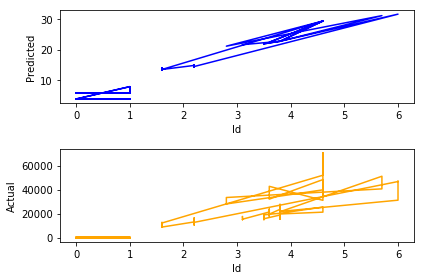

In [7]:
import numpy
#print("Final bias is: ",values.final_b)
#print("Final slope is: ",values.final_m)
y_pred=[]
y_true=[]
x1_val=[]
x2_val=[]
x3_val=[]
# Calculate Predicted Values
points=genfromtxt('cars.csv',delimiter=",")
for i in range(1,len(points)):
    x1=points[i,9]
    x2=points[i,6]
    x3=points[i,7]
    x1_val.append(points[i,9])
    x2_val.append(points[i,6])
    x3_val.append(points[i,7])
    y_pred.append(values.f_b0+values.f_b1*x1+values.f_b2*x2+values.f_b3*x3)
    y_true.append(points[i,0])
plt.subplot(2,1,1)
plt.plot(numpy.array(x1_val),numpy.array(x2_val),numpy.array(x3_val),numpy.array(y_pred),color="blue")
plt.xlabel('Id')
plt.ylabel('Predicted')
plt.subplot(2,1,2)
plt.xlabel('Id')
plt.ylabel('Actual')
plt.plot(numpy.array(x1_val),numpy.array(x2_val),numpy.array(x3_val),numpy.array(y_true),color="orange")
plt.tight_layout()
plt.show()